Session 8
====
Today we'll look at lots of expression types that we've skipped so far, then begin looking into how Python allows us to create our own datatypes, or *classes*. A class is a type of object that has specific capabilities for solving a particular problem. Python classes can be derived from other classes, or can be composed from instances of other classes.

Phew! That's a lot of words. But first, let's put a few loose items away...

A `pairs` generator
---
Last time, we started talking about a generator that yields up pairs of consecutive entries in a list. Here we go!

In Python, sometimes we need an iterator to traverse a built-in collection (like a list). Python offers the `iter()` function that makes a generator-like object for accessing the items in the list. The `iter()` function may be used to create generators for any and all Python collections that support the iterator protocol. The `next()` function takes an iterator and yields the next item in the sequence.  

In [7]:
it = iter([1,2,3,])
next(it)

1

In [8]:
next(it)

2

In [9]:
next(it)

3

In [10]:
next(it)

StopIteration: 

In [12]:
def ipairs(seq):
    '''
    Yields a sequence of pairs from the seqence provided. For example,
    
    ipairs([1,2,3,4]) --> (1,2) (2,3) (3,4)
    '''
    it = iter(seq)
    # Grab the first entry to start the pair sequence
    i1 = next(it)
    
    # This loop picks up from the second entry in the input sequence.
    # Each time through this loop, i2 takes on a new value.
    for i2 in it:
        yield (i1, i2)
        # Now, store the second value to begin the next pair
        i1 = i2

In [13]:
for tu in ipairs([1,2,3,4,5,6,7,8,9,10]):
    print(tu)

(1, 2)
(2, 3)
(3, 4)
(4, 5)
(5, 6)
(6, 7)
(7, 8)
(8, 9)
(9, 10)


In [14]:
# ipairs works with any iterable object, even a generator!

for tu in ipairs(ipairs([1,2,3,4,5,6,7,8,9,10])):
    print(tu)

((1, 2), (2, 3))
((2, 3), (3, 4))
((3, 4), (4, 5))
((4, 5), (5, 6))
((5, 6), (6, 7))
((6, 7), (7, 8))
((7, 8), (8, 9))
((8, 9), (9, 10))


Ternary expressions
---
We can write expressions with an if-then-else decision within the expression!

In [16]:
y = 47

x = y + 3 if y < 40 else 100
print(x)

100


Chained inequalities
---
We can chain two inequalities to check for a value within a range.

In [18]:
xmin = -5
xmax = 5

x = -6
y = x * x if -5 <= x <= 5 else 0
print(y)

0


In [20]:
x = 2
-5 <= x <= 5

True

Anonymous functions (the `lambda`) keyword
---
We've put this off long enough. Let's talk about anonymous functions. We've seen a lot of functions like this one...


In [21]:
def f(x):
    ''' Function that has a return value that can be evaluated as an expression '''
    return 2 * x + 1

f(19)

39

We can write an *anonymous* function, or a function that has no name, using the `lambda` keyword:

In [22]:
lambda x: 2 * x + 1

<function __main__.<lambda>(x)>

Notice that the result of that expression is a *function*! We can call that function, just like any other:

In [23]:
(lambda x: 2 * x + 1)(19)

39

Recalling that any function is just a Python object, we can even give it a name...

In [24]:
g = lambda x: 2 * x + 1
g(19)

39

In [26]:
h = lambda x: x * x if -5 <= x <= 5 else 0
h(6)

0

In [27]:
# A two-argument lambda
a_func = lambda x, y: x + 2 *y

a_func(3, 9)

21

In [30]:
b_func = lambda x, y=0: x + 2 * y

print(f'b_func(9, 0) {b_func(9)}')
print(f'b_func(9, 2) {b_func(9, 2)}')

b_func(9, 0) 9
b_func(9, 2) 13


So what? Why do we want lambdas? One reason: sorting!
---
It turns out that there are lots of times when we need a function, but only for one purpose, e.g. a call into another function. Here's an example. We have the ability to sort a list in place by using the `sort()` method (or we can use the `sorted` generator if we like).

In [31]:
my_data = [9, -3, 2, 7, -19, 42, 87]


In [32]:
# The sort() method sorts a list
my_data.sort()
my_data

[-19, -3, 2, 7, 9, 42, 87]

In [33]:
# We can sort in revers order!
my_data.sort(reverse=True)
my_data

[87, 42, 9, 7, 2, -3, -19]

In [34]:
# Traverse the list in sorted order
my_data = [9, -3, 2, 7, -19, 42, 87]

for i in sorted(my_data):
    print(i)

-19
-3
2
7
9
42
87


In [38]:
# Sort my list in order of squares
for i in sorted(my_data, key=lambda x: x * x):
     print(i)

2
-3
7
9
-19
42
87


In [40]:
# Just for fun, we can use the shuffle() function of the `random` package!
import random

random.shuffle(my_data)
my_data

[-19, 9, 7, 42, 2, 87, -3]

In [45]:
random.shuffle(my_data)
my_data

[-3, 7, 9, -19, 2, 42, 87]

Sorting works with any list, but imagine that we are sorting a list of tuples -- how are they sorted?

In [47]:
# Aha! It sorts by the first entry of each tuple!

list_of_tuples = [(1, 9), (-5, 3), (4, -5), (10, 10)]
for tu in sorted(list_of_tuples):
    print(tu)

(-5, 3)
(1, 9)
(4, -5)
(10, 10)


But... what if we want to sort by the second entry?

Well, the `sort` method of lists and the `sorted` generator offer an optional argument, `key`, which is a function that is to be performed on each of the entries in the collection to be sorted. So... if we need a function that returns the second entry in each tuple, we can do this:

In [48]:
def second_value(tu):
    ''' Returns the second entry in the tuple provided '''
    return tu[1]

for tu in sorted(list_of_tuples, key=second_value):
    print(tu)

(4, -5)
(-5, 3)
(1, 9)
(10, 10)


Let's try it with a `lambda`...

In [49]:
for tu in sorted(list_of_tuples, key=lambda x: x[1]):
    print(tu)

(4, -5)
(-5, 3)
(1, 9)
(10, 10)


There are plenty more chances for us to use `lambda` expressions. They show up frequently when we Google for solutions to common problems.

Another bit of fun with list comprehensions and generators
---
Here are a few problems to solve.

In [51]:
%matplotlib inline

import functools
import matplotlib.pyplot as plt

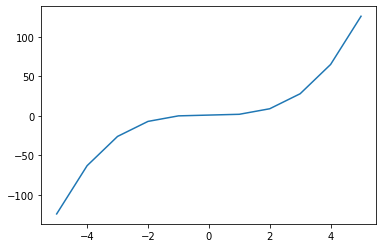

In [52]:
# 1. Use list comprehensions to plot the function y = x^3 + 1 from x=-5 to x=5

x = list(range(-5, 6))
y = [ xi ** 3 + 1 for xi in x ]
plt.plot(x, y)

In [53]:
# 2. Use the functools.reduce() function to calculate the product of 
#    the first five positive integers
#
#    reduce() takes a function of two arguments,
#             a sequence of items to evaluate
#             and an initial value.
#
#             It then repeatedly uses the function on a current value
#             and all the entries in the sequence
#
#    We'll use a lambda to make the function...

from functools import reduce

def product(x, y):
    return x * y

reduce(product, range(1, 6))


120

In [54]:
reduce(lambda x, y: x * y, range(1, 6))

120

In [57]:
# 3. Write a dictionary comprehension that takes a list of keys and a list of values
#    and builds a dictionary from them...

keys = ['a', 'b', 'd', 'w', 'r', 'z',]
values = [99, 104, 85, 17, 42, 4,]

{ k:v for k, v in zip(keys, values) }

{'a': 99, 'b': 104, 'd': 85, 'w': 17, 'r': 42, 'z': 4}

In [59]:
# 4. Use nested list comprehensions to make a multiplication table for 
#    values ranging from 1 to 12, represented as a list of lists.

[ [ i * j for i in range(1, 13) ] for j in range(1, 13) ]


[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24],
 [3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36],
 [4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48],
 [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60],
 [6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72],
 [7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 84],
 [8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96],
 [9, 18, 27, 36, 45, 54, 63, 72, 81, 90, 99, 108],
 [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120],
 [11, 22, 33, 44, 55, 66, 77, 88, 99, 110, 121, 132],
 [12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144]]

In [62]:
# 5. Given a list of team names, the number of team wins, and the number of 
#    team losses, make a table of the teams and their winning percentages.
#    Sort the list by the team name.

teams = ['cardinals', 'brewers', 'cubs', 'reds', 'pirates']
wins = [91, 89, 84, 75, 69]
losses = [71, 73, 78, 87, 93]

for tu in sorted( ( (t, w/(w +l)) for t, w, l in zip(teams, wins, losses) ),
                  key=lambda z:z[1] ):
    print(tu)


('pirates', 0.42592592592592593)
('reds', 0.46296296296296297)
('cubs', 0.5185185185185185)
('brewers', 0.5493827160493827)
('cardinals', 0.5617283950617284)
